#### Import modules and read data

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [2]:
xlsx = pd.read_excel(os.getcwd() + '/Data/covid-19-raw-data-4-12-2021.xlsx', sheet_name = ['CasesByDate (Test Date)', 'Hospitalization from Hospitals'], engine = 'openpyxl')

In [3]:
cases, hosptl = xlsx['CasesByDate (Test Date)'], xlsx['Hospitalization from Hospitals']
cases.shape, hosptl.shape

((439, 4), (373, 9))

In [4]:
cases.head()

,Date,Positive Total,Positive New,7-day confirmed case average
0,2020-01-29,1,1,NaN
1,2020-01-30,1,0,NaN
2,2020-01-31,1,0,NaN
3,2020-02-01,1,0,NaN
4,2020-02-02,1,0,NaN


In [5]:
hosptl.head()

,Date,Total number of COVID patients in hospital today,Net new number of COVID patients in hospital today,7 day average of COVID hospitalizations,ICU,Net New number ICU,Intubated,Net New number intubated,New COVID-19 hospitalizations
0,2020-04-04,1370,NaN,NaN,438,242,NaN,NaN,NaN
1,2020-04-05,1632,262.0,NaN,526,88,NaN,NaN,NaN
2,2020-04-06,1677,45.0,NaN,542,16,NaN,NaN,NaN
3,2020-04-07,1831,154.0,NaN,575,33,NaN,NaN,NaN
4,2020-04-08,2119,288.0,NaN,659,84,NaN,NaN,NaN


#### Total cases over time

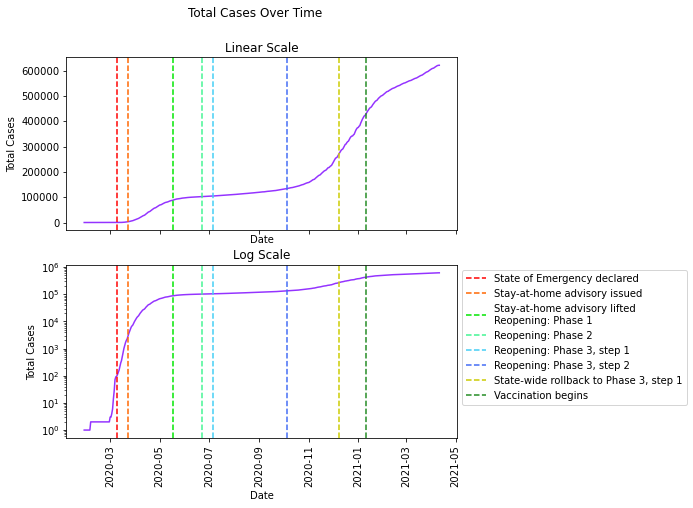

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize = (7, 7))
fig.suptitle('Total Cases Over Time')
# fig.subplots_adjust(hspace = 0.7)

ax1.plot(cases['Date'], cases['Positive Total'], color = '#9433ff')
ax1.axvline(pd.to_datetime('2020-03-10'), ls = '--', color = '#ff0000')
ax1.axvline(pd.to_datetime('2020-03-23'), ls = '--', color = '#ff6600')
ax1.axvline(pd.to_datetime('2020-05-18'), ls = '--', color = '#00e600')
ax1.axvline(pd.to_datetime('2020-06-22'), ls = '--', color = '#42f593')
ax1.axvline(pd.to_datetime('2020-07-06'), ls = '--', color = '#42cef5')
ax1.axvline(pd.to_datetime('2020-10-05'), ls = '--', color = '#426cf5')
ax1.axvline(pd.to_datetime('2020-12-08'), ls = '--', color = '#cccc00')
ax1.axvline(pd.to_datetime('2021-01-11'), ls = '--', color = '#228b22')
ax1.set_title('Linear Scale')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Cases')

ax2.plot(cases['Date'], cases['Positive Total'], color = '#9433ff')
ax2.axvline(pd.to_datetime('2020-03-10'), ls = '--', color = '#ff0000', label = 'State of Emergency declared')
ax2.axvline(pd.to_datetime('2020-03-23'), ls = '--', color = '#ff6600', label = 'Stay-at-home advisory issued')
ax2.axvline(pd.to_datetime('2020-05-18'), ls = '--', color = '#00e600', label = 'Stay-at-home advisory lifted\nReopening: Phase 1')
ax2.axvline(pd.to_datetime('2020-06-22'), ls = '--', color = '#42f593', label = 'Reopening: Phase 2')
ax2.axvline(pd.to_datetime('2020-07-06'), ls = '--', color = '#42cef5', label = 'Reopening: Phase 3, step 1')
ax2.axvline(pd.to_datetime('2020-10-05'), ls = '--', color = '#426cf5', label = 'Reopening: Phase 3, step 2')
ax2.axvline(pd.to_datetime('2020-12-08'), ls = '--', color = '#cccc00', label = 'State-wide rollback to Phase 3, step 1')
ax2.axvline(pd.to_datetime('2021-01-11'), ls = '--', color = '#228b22', label = 'Vaccination begins')
ax2.set_yscale('log')
ax2.set_title('Log Scale')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Cases')

plt.xticks(rotation = 90)
plt.legend(loc = 2, bbox_to_anchor = (1, 1))
plt.show()
plt.close()

#### New positive cases

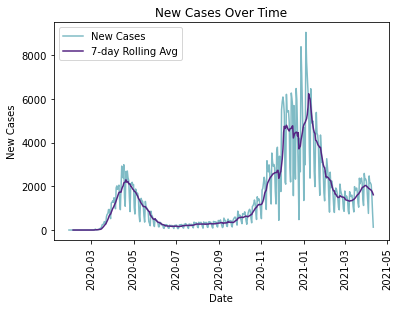

In [35]:
plt.plot(cases['Date'], cases['Positive New'], alpha = 0.5, color = '#00788c', label = 'New Cases')
plt.plot(cases['Date'], cases['Positive New'].rolling(7).mean(), color = '#552583', label = '7-day Rolling Avg')
plt.title('New Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation = 90)
plt.legend()
plt.show()
plt.close()